这个任务里面train数据与test数据都是cell分为code和markdown两种的。其中code都是按照正确顺序排好放在前面的，markdown类型的cell乱序摆放在后面，最后是只需要给出对markdown的cell的排序即可

In [1]:
import json
from pathlib import Path
import numpy as np
import pandas as pd
# from scipy import sparse
from tqdm import tqdm

pd.options.display.width = 180
pd.options.display.max_colwidth = 120

### 加载数据

我们将在这里加载笔记本，并将它们连接到dataFrame中，以便于处理。

In [2]:
def read_notebook(path):
    df = pd.read_json(
            path,
            dtype={'cell_type':'category' , 'source':'str'}
    ).assign(id=path.stem).rename_axis('cell_id')
    return df

In [3]:
paths_train = list(Path('train').glob('*json'))[: 10000]
paths_train

[PosixPath('train/00001756c60be8.json'),
 PosixPath('train/00015c83e2717b.json'),
 PosixPath('train/0001bdd4021779.json'),
 PosixPath('train/0001daf4c2c76d.json'),
 PosixPath('train/0002115f48f982.json'),
 PosixPath('train/00035108e64677.json'),
 PosixPath('train/00038c2941faa0.json'),
 PosixPath('train/00039fc77a9dd1.json'),
 PosixPath('train/00058dc97eae4b.json'),
 PosixPath('train/000597ac4c6700.json'),
 PosixPath('train/000624d747afd3.json'),
 PosixPath('train/00062ab8487156.json'),
 PosixPath('train/000757b90aaca0.json'),
 PosixPath('train/0007f21ee357b5.json'),
 PosixPath('train/000890decea38e.json'),
 PosixPath('train/0008ba887b3817.json'),
 PosixPath('train/0009acaa9aa47e.json'),
 PosixPath('train/000a2f5243e1ca.json'),
 PosixPath('train/000a4651cce8f4.json'),
 PosixPath('train/000af347c31e72.json'),
 PosixPath('train/000b8e6d58544b.json'),
 PosixPath('train/000bbb79a2fe3c.json'),
 PosixPath('train/000c0a9b2fef4d.json'),
 PosixPath('train/000c1e0e45bb25.json'),
 PosixPath('trai

In [4]:
read_notebook(paths_train[0]).head(10)

,cell_type,source,id
cell_id,,,
1862f0a6,code,# This Python 3 environment comes with many helpful analytics libraries installed\n# It is defined by the kaggle/pyt...,00001756c60be8
2a9e43d6,code,"import numpy as np\nimport pandas as pd\nimport random\n\nfrom sklearn.model_selection import train_test_split, cros...",00001756c60be8
038b763d,code,import warnings\nwarnings.filterwarnings('ignore'),00001756c60be8
2eefe0ef,code,matplotlib.rcParams.update({'font.size': 14}),00001756c60be8
0beab1cd,code,"def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):\n print(""Train R2:\...",00001756c60be8
9a78ab76,code,TRAIN_DATASET_PATH = '/kaggle/input/real-estate-price-prediction-moscow/train.csv'\nTEST_DATASET_PATH = '/kaggle/inp...,00001756c60be8
ebe125d5,code,train_df = pd.read_csv(TRAIN_DATASET_PATH)\ntrain_df.tail(),00001756c60be8
d9dced8b,code,train_df.dtypes,00001756c60be8
86497fe1,code,num_feat = list(train_df.select_dtypes(exclude='object').columns)\nobj_feat = list(train_df.select_dtypes(include='o...,00001756c60be8


In [5]:
notebooks_train = [
    read_notebook(path) for path in tqdm(paths_train , desc='Train NBS')
]
df = (
    pd.concat(notebooks_train) #按行拼接
    .set_index('id' , append=True)
    .swaplevel()
    .sort_index(level='id' , sort_remaining=False)
)

Train NBS: 100%|██████████| 10000/10000 [00:49<00:00, 200.56it/s]


In [6]:
df.head(100)

cell_type                                                                                                                   source
id             cell_id                                                                                                                                    
00001756c60be8 1862f0a6      code  # This Python 3 environment comes with many helpful analytics libraries installed\n# It is defined by the kaggle/pyt...
               2a9e43d6      code  import numpy as np\nimport pandas as pd\nimport random\n\nfrom sklearn.model_selection import train_test_split, cros...
               038b763d      code                                                                       import warnings\nwarnings.filterwarnings('ignore')
               2eefe0ef      code                                                                            matplotlib.rcParams.update({'font.size': 14})
               0beab1cd      code  def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):\n    print("Train R2:\...
...                           ...                                                                                                                      ...
00015c83e2717b d47d3338      code                                              train_nan_df.drop(['missingCount','allMissing'], axis =1, inplace = True  )
               c5b89474      code                                                                                        train_nan_df.label.value_counts()
               b5ef409a      code                                                                                           train_df = train_nan_df.copy()
               7bb6803b      code                                                                                                 test_df = pd.DataFrame()
               36b95373      code                                                                                                          train_df.head()

[100 rows x 2 columns]

每个笔记本都有首先给出的所有代码单元格(code cell)，然后是标记单元格(markdown cell)。代码单元格按正确的相对顺序排列，而标记单元格则被打乱

In [7]:
#看一个样例
nb_id = df.index.unique('id')[6]
print('Notebook: ', nb_id)
print("The disordered notebook: ")
nb = df.loc[nb_id,:]
display(nb)

Notebook:  00038c2941faa0
The disordered notebook: 


,cell_type,source
cell_id,,
3e551fb7,code,# This Python 3 environment comes with many helpful analytics libraries installed\n# It is defined by the kaggle/pyt...
45049ad8,code,"train_data = pd.read_csv(""/kaggle/input/titanic/train.csv"")\ntest_data = pd.read_csv(""/kaggle/input/titanic/test.csv"")"
123b4f4c,code,import plotly.express as px
0b92cb59,code,train_data.head(20)
df963df4,code,train_data.isnull().sum() #checking out which column has most no. of NaN Values
0f3db81b,code,"px.bar(data_frame=train_data, x='Sex', y='Survived',color='Sex',facet_row_spacing=0, title=""Relation between Gender ..."
33ff3073,code,"total_passengers = train_data['Sex'].count()\ncount_males = 0\ncount_females = 0\nfor i,j in zip(train_data['Sex'], ..."
818c4c15,code,"from sklearn.ensemble import RandomForestClassifier\n\n\ny = train_data[""Survived""]\n\nfeatures = [""Pclass"", ""Sex"", ..."
6cfbe868,markdown,## Survival Rate for Male Passenger is : 12.235 %\n\n## Survival Rate for Female Passenger is : 26.150 %


### 排序单元格(cell)

In [8]:
df_orders = pd.read_csv(
    Path('train_orders.csv'),
    index_col = 'id',
    squeeze = True
)
df_orders

/tmp/ipykernel_321/3243930295.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df_orders = pd.read_csv(


id
00001756c60be8    1862f0a6 448eb224 2a9e43d6 7e2f170a 038b763d 77e56113 2eefe0ef 1ae087ab 0beab1cd 8ffe0b25 9a78ab76 0d136e08 8a4c95d1...
00015c83e2717b    2e94bd7a 3e99dee9 b5e286ea da4f7550 c417225b 51e3cd89 2600b4eb 75b65993 cf195f8b 25699d02 72b3201a f2c750d3 de148b56...
0001bdd4021779       3fdc37be 073782ca 8ea7263c 80543cd8 38310c80 073e27e5 015d52a4 ad7679ef 7fde4f04 07c52510 0a1a7a39 0bcd3fef 58bf360b
0001daf4c2c76d    97266564 a898e555 86605076 76cc2642 ef279279 df6c939f 2476da96 00f87d0a ae93e8e6 58aadb1d d20b0094 986fd4f1 b4ff1015...
0002115f48f982                                           9ec225f0 18281c6c e3b6b115 4a044c54 365fe576 a3188e54 b3f6e12d ee7655ca 84125b7a
                                                                           ...                                                           
fffc30d5a0bc46    09727c0c ff1ea6a0 ddfef603 a01ce9b3 3ba953ee bf92a015 f4a0492a 095812e6 53125cfe aa32a700 63340e73 06d8c952 400ceb37...
fffc3b44869198    978a5137 faa4

In [9]:
df_orders = df_orders.str.split() #将cell_ids放入list
df_orders

id
00001756c60be8    [1862f0a6, 448eb224, 2a9e43d6, 7e2f170a, 038b763d, 77e56113, 2eefe0ef, 1ae087ab, 0beab1cd, 8ffe0b25, 9a78ab76, 0d136...
00015c83e2717b    [2e94bd7a, 3e99dee9, b5e286ea, da4f7550, c417225b, 51e3cd89, 2600b4eb, 75b65993, cf195f8b, 25699d02, 72b3201a, f2c75...
0001bdd4021779    [3fdc37be, 073782ca, 8ea7263c, 80543cd8, 38310c80, 073e27e5, 015d52a4, ad7679ef, 7fde4f04, 07c52510, 0a1a7a39, 0bcd3...
0001daf4c2c76d    [97266564, a898e555, 86605076, 76cc2642, ef279279, df6c939f, 2476da96, 00f87d0a, ae93e8e6, 58aadb1d, d20b0094, 986fd...
0002115f48f982                                 [9ec225f0, 18281c6c, e3b6b115, 4a044c54, 365fe576, a3188e54, b3f6e12d, ee7655ca, 84125b7a]
                                                                           ...                                                           
fffc30d5a0bc46    [09727c0c, ff1ea6a0, ddfef603, a01ce9b3, 3ba953ee, bf92a015, f4a0492a, 095812e6, 53125cfe, aa32a700, 63340e73, 06d8c...
fffc3b44869198    [978a5137, fa

得到一个样例的正确顺序

In [11]:
cell_order = df_orders.loc[nb_id] 
print("The ordered notebook: ")
nb.loc[cell_order , :]

The ordered notebook: 


,cell_type,source
cell_id,,
3e551fb7,code,# This Python 3 environment comes with many helpful analytics libraries installed\n# It is defined by the kaggle/pyt...
45049ad8,code,"train_data = pd.read_csv(""/kaggle/input/titanic/train.csv"")\ntest_data = pd.read_csv(""/kaggle/input/titanic/test.csv"")"
8bb41691,markdown,### Checking out the Titanic Dataset \n
123b4f4c,code,import plotly.express as px
0b92cb59,code,train_data.head(20)
5a8b6e2d,markdown,## EDA is all about asking the right questions\n\nWhat are some questions that come to your mind when you're checkin...
df963df4,code,train_data.isnull().sum() #checking out which column has most no. of NaN Values
3c7d19bc,markdown,From the above inference Cabin needs to be either dropped or needs to be filled with Appropriate values
0f3db81b,code,"px.bar(data_frame=train_data, x='Sex', y='Survived',color='Sex',facet_row_spacing=0, title=""Relation between Gender ..."


单元格的正确数字位置，我们称之为单元格的rank。我们可以通过引用train_orders.csv中给出的单元格id的真实顺序来查找笔记本中单元格的rank。

In [12]:
def get_ranks(base , derived):
    #base为标准顺序表 ， derived为乱序后的list
    return [base.index(d) for d in derived]

cell_ranks = get_ranks(cell_order , list(nb.index))
nb.insert(0 , 'rank' , cell_ranks)
nb

,rank,cell_type,source
cell_id,,,
3e551fb7,0,code,# This Python 3 environment comes with many helpful analytics libraries installed\n# It is defined by the kaggle/pyt...
45049ad8,1,code,"train_data = pd.read_csv(""/kaggle/input/titanic/train.csv"")\ntest_data = pd.read_csv(""/kaggle/input/titanic/test.csv"")"
123b4f4c,3,code,import plotly.express as px
0b92cb59,4,code,train_data.head(20)
df963df4,6,code,train_data.isnull().sum() #checking out which column has most no. of NaN Values
0f3db81b,8,code,"px.bar(data_frame=train_data, x='Sex', y='Survived',color='Sex',facet_row_spacing=0, title=""Relation between Gender ..."
33ff3073,10,code,"total_passengers = train_data['Sex'].count()\ncount_males = 0\ncount_females = 0\nfor i,j in zip(train_data['Sex'], ..."
818c4c15,13,code,"from sklearn.ensemble import RandomForestClassifier\n\n\ny = train_data[""Survived""]\n\nfeatures = [""Pclass"", ""Sex"", ..."
6cfbe868,11,markdown,## Survival Rate for Male Passenger is : 12.235 %\n\n## Survival Rate for Female Passenger is : 26.150 %


按cell排序是为notebook排序的另一种方式。

In [14]:
from pandas.testing import assert_frame_equal

print(assert_frame_equal(nb.loc[cell_order , :] , nb.sort_values('rank')))

None


我们将用于baseline模型的算法使用单元格列作为目标，因此让我们为每个notebook创建列的dataFrame

In [15]:
#拼接一下方便后面merge在一起
df_orders_ = df_orders.to_frame().join(
    df.reset_index('cell_id').groupby('id')['cell_id'].apply(list),
    how = 'right'
)
df_orders_

,cell_order,cell_id
id,,
00001756c60be8,"[1862f0a6, 448eb224, 2a9e43d6, 7e2f170a, 038b763d, 77e56113, 2eefe0ef, 1ae087ab, 0beab1cd, 8ffe0b25, 9a78ab76, 0d136...","[1862f0a6, 2a9e43d6, 038b763d, 2eefe0ef, 0beab1cd, 9a78ab76, ebe125d5, d9dced8b, 86497fe1, e2c8e725, ff7c44ed, 0e7c9..."
00015c83e2717b,"[2e94bd7a, 3e99dee9, b5e286ea, da4f7550, c417225b, 51e3cd89, 2600b4eb, 75b65993, cf195f8b, 25699d02, 72b3201a, f2c75...","[c417225b, 51e3cd89, 2600b4eb, 75b65993, cf195f8b, 25699d02, de148b56, 9901472c, 10377ef8, 1f462e2f, fceeb3e6, 2af2a..."
0001bdd4021779,"[3fdc37be, 073782ca, 8ea7263c, 80543cd8, 38310c80, 073e27e5, 015d52a4, ad7679ef, 7fde4f04, 07c52510, 0a1a7a39, 0bcd3...","[3fdc37be, 073782ca, 8ea7263c, 80543cd8, 38310c80, 073e27e5, 015d52a4, ad7679ef, 07c52510, 0a1a7a39, 0bcd3fef, 7fde4..."
0001daf4c2c76d,"[97266564, a898e555, 86605076, 76cc2642, ef279279, df6c939f, 2476da96, 00f87d0a, ae93e8e6, 58aadb1d, d20b0094, 986fd...","[86605076, df6c939f, 00f87d0a, 986fd4f1, 9b761026, 6f271c86, 97c3f99b, cfa510c5, 374a5179, df5f7c1f, 27060ab9, 4c739..."
0002115f48f982,"[9ec225f0, 18281c6c, e3b6b115, 4a044c54, 365fe576, a3188e54, b3f6e12d, ee7655ca, 84125b7a]","[18281c6c, e3b6b115, 4a044c54, 365fe576, a3188e54, b3f6e12d, ee7655ca, 84125b7a, 9ec225f0]"
...,...,...
125e52cb8b5b7c,"[50d1ea92, 6d04d26b, 7d12f8f0, b16d6b17, 574cac96, cc0c8a9c, 35daff6b, 72ca78e0, 361a0841, 954eb26a, 1b1e170e, 72b12...","[cc0c8a9c, 72ca78e0, 954eb26a, 72b12e0b, 5209ee38, 64524d5d, 15b7f750, 1b2defc4, 758258bd, f92b614c, 05bf4c12, 3ff65..."
125e63ea0a1039,"[73b5f6ca, 042229d1, 7cbdfe47, 86515c5f, e790981c, 8c250113, 943f2080, 5212a508, a5d042a3, 61dd37f8, f55cf7b1, aa7c6...","[73b5f6ca, 042229d1, 7cbdfe47, 86515c5f, e790981c, 943f2080, 5212a508, f55cf7b1, a2d05a85, cbb8ae81, 9766bb31, a09e7..."
125e67f422c340,"[a939baa6, 344973d0, a28447e3, f5974806, 26109fac, 15e23c54, a4215255, 51c78411, 8322ae5d, e01c2c9a, d1779222, 14621...","[344973d0, 26109fac, 15e23c54, 51c78411, d1779222, c18c82e2, 6dda3339, 9964bd10, 96207287, def8211b, 21d68099, a4215..."


In [16]:
ranks = {}
for id_ , cell_order , cell_id in df_orders_.itertuples():
    ranks[id_] = {'cell_id':cell_id , 'rank':get_ranks(cell_order , cell_id)}
    
df_ranks = (
    pd.DataFrame.from_dict(ranks , orient='index')
    .rename_axis('id')
    .apply(pd.Series.explode)
    .set_index('cell_id' , append=True)
)
df_ranks

rank
id             cell_id      
00001756c60be8 1862f0a6    0
               2a9e43d6    2
               038b763d    4
               2eefe0ef    6
               0beab1cd    8
...                      ...
125ef3d1595c5d 653dad94   20
               19e283d7   10
               c4d70f32   18
               7981b5de    0
               4a20230b   14

[461759 rows x 1 columns]

### 分组

df_ancesters.csv文件标识源自共同来源的notebook组，即属于同一分叉树的notebook。

In [17]:
df_ancestors = pd.read_csv('train_ancestors.csv' , index_col='id')
df_ancestors

,ancestor_id,parent_id
id,,
00001756c60be8,945aea18,NaN
00015c83e2717b,aa2da37e,317b65d12af9df
0001bdd4021779,a7711fde,NaN
0001daf4c2c76d,090152ca,NaN
0002115f48f982,272b483a,NaN
...,...,...
fffc30d5a0bc46,6aed207b,NaN
fffc3b44869198,a6aaa8d7,NaN
fffc63ff750064,0a1b5b65,NaN


In [18]:
df = df.reset_index().merge(df_ranks , on=['id' , 'cell_id']) \
    .merge(df_ancestors , on=['id'])
df

,id,cell_id,cell_type,source,rank,ancestor_id,parent_id
0,00001756c60be8,1862f0a6,code,# This Python 3 environment comes with many helpful analytics libraries installed\n# It is defined by the kaggle/pyt...,0,945aea18,NaN
1,00001756c60be8,2a9e43d6,code,"import numpy as np\nimport pandas as pd\nimport random\n\nfrom sklearn.model_selection import train_test_split, cros...",2,945aea18,NaN
2,00001756c60be8,038b763d,code,import warnings\nwarnings.filterwarnings('ignore'),4,945aea18,NaN
3,00001756c60be8,2eefe0ef,code,matplotlib.rcParams.update({'font.size': 14}),6,945aea18,NaN
4,00001756c60be8,0beab1cd,code,"def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):\n print(""Train R2:\...",8,945aea18,NaN
...,...,...,...,...,...,...,...
461754,125ef3d1595c5d,653dad94,markdown,## 10. Making predictions and evaluating performance\n<p>But how well does our model perform? </p>\n<p>We will now e...,20,a5400cbb,NaN
461755,125ef3d1595c5d,19e283d7,markdown,## 5. Handling the missing values (part iii)\n<p>We have successfully taken care of the missing values present in th...,10,a5400cbb,NaN
461756,125ef3d1595c5d,c4d70f32,markdown,"## 9. Fitting a logistic regression model to the train set\n<p>Essentially, predicting if a credit card application ...",18,a5400cbb,NaN
461757,125ef3d1595c5d,7981b5de,markdown,<p>In this small project I will build a supervised machine learning model to predict if a credit card application w...,0,a5400cbb,NaN


<AxesSubplot:>

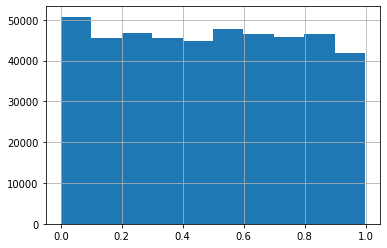

In [19]:
#pct_rank可以看成是将rank锁定到0-1区间内 ， 百分比排名
df["pct_rank"] = df["rank"] / df.groupby("id")["cell_id"].transform("count")
df["pct_rank"].hist(bins=10)

### 打乱并创建验证集，测试集

In [20]:
from sklearn.model_selection import GroupShuffleSplit

NVAILD = 0.1 # 验证集的比例
splitter = GroupShuffleSplit(n_splits=1 , test_size=NVAILD , random_state=416)
train_index , vali_index = next(splitter.split(df , groups=df["ancestor_id"]))

train_df = df.loc[train_index].reset_index(drop=True)
vali_df = df.loc[vali_index].reset_index(drop=True)

In [21]:
vali_df.head()

,id,cell_id,cell_type,source,rank,ancestor_id,parent_id,pct_rank
0,0001daf4c2c76d,86605076,code,# This Python 3 environment comes with many helpful analytics libraries installed\n# It is defined by the kaggle/pyt...,2,090152ca,NaN,0.008734
1,0001daf4c2c76d,df6c939f,code,import matplotlib as mlp\nimport matplotlib.pyplot as plt\nimport numpy as np\n\n# plot simple sin & cos function\n\...,5,090152ca,NaN,0.021834
2,0001daf4c2c76d,00f87d0a,code,%matplotlib,7,090152ca,NaN,0.030568
3,0001daf4c2c76d,986fd4f1,code,"x = np.linspace(0, 10, 100)\nfig=plt.figure()\nplt.plot(x,np.sin(x),'_')\nplt.plot(x,np.cos(x), '_')\n\nfig.savefig(...",11,090152ca,NaN,0.048035
4,0001daf4c2c76d,9b761026,code,fig.canvas.get_supported_filetypes()\n,13,090152ca,NaN,0.056769


In [25]:
vali_df.shape #是全部数据的0.1

(47288, 8)

In [28]:
vali_df.groupby("ancestor_id")["cell_id"].apply("count")

ancestor_id
0000585e     22
0041bccb     40
00463b54     22
005c7f81     31
006b2482     45
           ... 
fd96e1e7     79
fdcd5792     15
fe26ba65    139
fe27ecbd     20
ff87a9af     44
Name: cell_id, Length: 980, dtype: int64

In [32]:
vali_df.groupby(["id" , "ancestor_id"])["cell_id"].apply("count")

id              ancestor_id
0001daf4c2c76d  090152ca       229
00062ab8487156  de362dd8        12
0008ba887b3817  bde84293        49
000e671b3324e2  db27dfa2        30
000eafa6f0625b  1b881fd9        65
                              ... 
12348d388c7bba  9770f788         8
123efaedf717e4  5a72e61c        24
1246e2fc4f7429  5b333028        49
1247086f2dd2ab  3f014afe        34
124d35aeaac5be  63e11b8d        31
Name: cell_id, Length: 1009, dtype: int64

In [44]:
print("id的种类数：" , len(vali_df["id"].unique()))
print("ancestor_id的种类数：" , len(vali_df["ancestor_id"].unique()))

id的种类数： 1009
ancestor_id的种类数： 980


### 构造题目那种计算Loss的函数，单纯试一下

In [45]:
from bisect import bisect #用于维护有序list，使用二分查找法插入适当位置

#计算修改到正确顺序需要交换的次数
def count_inversions(ranks):
    inversions = 0
    sorted_so_far = []
    for i,u in enumerate(ranks):
        j = bisect(sorted_so_far , u)
        inversions += i - j
        sorted_so_far.insert(j,u)
    return inversions

#计算损失的函数
def kendall_tau(groud_truth , predication):
    total_inversions = 0
    total_2max = 0
    for gt , pred in zip(groud_truth , predication):
        ranks = [gt.index(x) for x in pred]
        total_inversions += count_inversions(ranks)
        n = len(gt)
        total_2max += n * (n -1 )
    return 1 - 4 * total_inversions / total_2max #题目的Loss计算方式

In [46]:
y_dummy = vali_df.groupby('id')["cell_id"].apply(list)
kendall_tau(df_orders.loc[y_dummy.index] , y_dummy)

0.42730044219608154

In [47]:
vali_df

,id,cell_id,cell_type,source,rank,ancestor_id,parent_id,pct_rank
0,0001daf4c2c76d,86605076,code,# This Python 3 environment comes with many helpful analytics libraries installed\n# It is defined by the kaggle/pyt...,2,090152ca,NaN,0.008734
1,0001daf4c2c76d,df6c939f,code,import matplotlib as mlp\nimport matplotlib.pyplot as plt\nimport numpy as np\n\n# plot simple sin & cos function\n\...,5,090152ca,NaN,0.021834
2,0001daf4c2c76d,00f87d0a,code,%matplotlib,7,090152ca,NaN,0.030568
3,0001daf4c2c76d,986fd4f1,code,"x = np.linspace(0, 10, 100)\nfig=plt.figure()\nplt.plot(x,np.sin(x),'_')\nplt.plot(x,np.cos(x), '_')\n\nfig.savefig(...",11,090152ca,NaN,0.048035
4,0001daf4c2c76d,9b761026,code,fig.canvas.get_supported_filetypes()\n,13,090152ca,NaN,0.056769
...,...,...,...,...,...,...,...,...
47283,124d35aeaac5be,83996f4c,markdown,"### Inference:\n\nSales increases with increment in expenditure of TV, Radio and Newspapers respectively. It shows l...",10,63e11b8d,NaN,0.322581
47284,124d35aeaac5be,3711158f,markdown,**Multiple Linear Regression for our data set**: \n\n<h5 align=center>$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 +......,7,63e11b8d,NaN,0.225806
47285,124d35aeaac5be,a0c06e43,markdown,## 7. Interaction of 'TV' and 'Radio' features,24,63e11b8d,NaN,0.774194
47286,124d35aeaac5be,6717c84b,markdown,"## **Equation for the multi-linear regression**\n\n<h4 align=""center""> $f(x) = \beta_0 + \sum_{j=1}^p X_j \beta_j$. ...",3,63e11b8d,NaN,0.096774


In [48]:
vali_df["cell_type"].value_counts()

code        31620
markdown    15668
Name: cell_type, dtype: int64

In [49]:
train_df_mark = train_df[train_df["cell_type"] == "markdown"].reset_index(drop=True)
vali_df_mark = vali_df[vali_df["cell_type"] == "markdown"].reset_index(drop=True)

In [50]:
from sklearn.metrics import mean_squared_error
#浅试一下MSE计算（这里用的都是假的target）
mean_squared_error(vali_df_mark["pct_rank"] , np.ones(vali_df_mark.shape[0]) * train_df_mark["pct_rank"].mean())

0.08855079817846012

### 准备模型

In [51]:
from tqdm import tqdm
import sys , os
from transformers import DistilBertModel , DistilBertTokenizer
import torch.nn.functional as F
import torch.nn as nn
import torch

MAX_LEN = 128
BERT_PATH = "distilbert-base-uncased"

class MarkdownModel(nn.Module):
    def __init__(self):
        super(MarkdownModel , self).__init__()
        self.distil_bert = DistilBertModel.from_pretrained(BERT_PATH)
        self.top = nn.Linear(768 , 1)
    
    def forward(self , ids , mask):
        x = self.distil_bert(ids , mask)[0] #得到CLS头
        print("CLS头为: " , x)
        x = self.top(x[: , 0 , :])
        return x

### 准备Dataset类

In [52]:
from torch.utils.data import DataLoader , Dataset

class MarkdownDataset(Dataset):
    def __init__(self , df , max_len):
        super().__init__()
        self.df = df.reset_index(drop=True)
        self.max_len = max_len
        self.tokenizer = DistilBertTokenizer.from_pretrained(BERT_PATH , do_lower_case=True)
    
    def __getitem__(self , index):
        row = self.df.iloc[index]
        inputs = self.tokenizer.encode_plus(
            row.source,
            max_length=self.max_len,
            padding="max_length",
            return_token_type_ids=True,
            truncation=True
        )
        ids = torch.LongTensor(inputs['input_ids'])
        mask = torch.LongTensor(inputs['attention_mask'])
        return ids , mask , torch.FloatTensor([row.pct_rank])
    
    def __len__(self):
        return self.df.shape[0]
    
train_dataset = MarkdownDataset(train_df_mark , max_len=MAX_LEN)
vali_dataset = MarkdownDataset(vali_df_mark, max_len=MAX_LEN)

vali_dataset[0]

(tensor([  101,  1001,  2795,  1997,  8417,  1008,  1031,  2930,  1015,  1011,
         12324,  2075, 13523, 24759,  4140, 29521,  1004,  4438, 10629,  1033,
          1006,  1001,  2930,  1011,  2028,  1007,  1008,  1031,  2930,  1016,
          1011, 10578,  2013,  1037,  5896,  1033,  1006,  1001,  2930,  1011,
          2048,  1007,  1008,  1031,  2930,  1017,  1011, 19158,  1996,  5436,
          1024,  2240,  6087,  1998,  6782,  1033,  1006,  1001,  2930,  1011,
          2093,  1007,  1008,  1031,  2930,  1018,  1011,  3722,  8040, 20097,
         14811,  1033,  1006,  1001,  2930,  1011,  2176,  1007,  1008,  1031,
          2930,  1019,  1011,  5107,  6026, 10697,  4304,  1998,  9530, 21163,
         14811,  1033,  1006,  1001,  2930,  1011,  2274,  1007,  1008,  1031,
          2930,  1020,  1011,  2010,  3406, 13113,  2015,  1010,  8026,  5582,
          2015,  1010,  1998,  4304,  1033,  1006,  1001,  2930,  1011,  2416,
          1007,  1008,  1031,  2930,  1021,  1011,  

In [53]:
vali_df_mark.iloc[0]

id                                                                                                                      0001daf4c2c76d
cell_id                                                                                                                       a898e555
cell_type                                                                                                                     markdown
source         # Table of Contents\n\n* [Section  1 - Importing matplotlib & Classic Graph](#section-one)  \n* [Section 2 - loading...
rank                                                                                                                                 1
ancestor_id                                                                                                                   090152ca
parent_id                                                                                                                          NaN
pct_rank                                               

### 设置优化器

In [54]:
def adjust_lr(optimizer , epoch):
    if epoch < 1:
        lr = 5e-5
    elif epoch < 2:
        lr = 1e-3
    elif epoch < 5:
        lr = 1e-4
    else:
        lr = 1e-5
    
    for p in optimizer.param_groups:
        p['lr'] = lr
    return lr

def get_optimizer(model):
    optimizer = torch.optim.Adam(filter(lambda p : p.requires_grad , model.parameters()) , lr=3e-4 , betas=(0.9 , 0.999) , eps=1e-8)
    return optimizer

### 设置dataLoader

In [55]:
batch_size = 32
num_workers = 8

train_loader = DataLoader(train_dataset , 
                          batch_size = batch_size , 
                          shuffle = True ,
                          num_workers = num_workers ,
                          pin_memory = False ,
                          drop_last = True)
vali_loader = DataLoader(vali_dataset, 
                         batch_size = batch_size, 
                         shuffle = False, 
                         num_workers = num_workers,
                         pin_memory = False, 
                         drop_last = False)

In [83]:
#将数据放入GPU
def read_data(data):
    return tuple(d.cuda() for d in data[: -1]) , data[-1].cuda()

试一下，看一下训练中的数据样式

In [82]:
def validate(model , vali_loader):
    model.eval()
    tbar = tqdm(vali_loader , file=sys.stdout)
    
    preds = []
    labels = []
    
    with torch.no_grad():
        for idx , data in enumerate(tbar):
            inputs , target = read_data(data)
            if idx == 1:
                print("\ninputs: " , inputs)
                print("target: " , target)
            
            pred = model(inputs[0] , inputs[1])
            if idx == 1:
                print("pred: " , pred)
            preds.append(pred.detach().cpu().numpy().ravel())
            labels.append(target.detach().cpu().numpy().ravel())
        return np.concatenate(labels) , np.concatenate(preds)
    
model = MarkdownModel()
model = model.cuda()
validate(model , vali_loader)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 1/490 [00:02<17:29,  2.15s/it]
inputs:  (tensor([[ 101, 7494, 4481,  ...,    0,    0,    0],
        [ 101, 1026, 1037,  ...,    0,    0,    0],
        [ 101, 1026, 1037,  ...,    0,    0,    0],
        ...,
        [ 101, 1026, 1037,  ...,    0,    0,    0],
        [ 101, 1001, 1001,  ...,    0,    0,    0],
        [ 101, 2115, 7928,  ...,    0,    0,    0]], device='cuda:0'), tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]], device='cuda:0'))
target:  tensor([[0.0393],
        [0.6157],
        [0.8908],
        [0.2271],
        [0.4803],
        [0.1528],
        [0.0524],
        [0.9214],
        [0.3668],
        [0.9825],
        [0.0437],
        [0.2882],
        [0.4236],
        [0.0349],
        [0.9127],
        [0.6201],
        [0.7293],
        [0.0131],
        [0.9520],
        [0.

(array([0.00436681, 0.5371179 , 0.6681223 , ..., 0.7741935 , 0.09677419,
        0.516129  ], dtype=float32),
 array([0.2675064 , 0.17709383, 0.44843242, ..., 0.45865825, 0.42705357,
        0.5122127 ], dtype=float32))

### 开始训练

In [84]:
def validate(model , vali_loader):
    model.eval()
    tbar = tqdm(vali_loader , file=sys.stdout)
    
    preds = []
    labels = []
    
    with torch.no_grad():
        for idx , data in enumerate(tbar):
            inputs , target = read_data(data)
            pred = model(inputs[0] , inputs[1])
            preds.append(pred.detach().cpu().numpy().ravel())
            labels.append(target.detach().cpu().numpy().ravel())
        return np.concatenate(labels) , np.concatenate(preds)
    
def train(model , train_loader , vali_loader , epochs):
    np.random.seed(416)
    optimizer = get_optimizer(model)
    criterion = torch.nn.MSELoss()
    
    for epoch in range(epochs):
        model.train()
        tbar = tqdm(train_loader , file=sys.stdout)
        
        lr = adjust_lr(optimizer , epoch)
        loss_list = []
        preds = []
        labels = []
        
        for idx , data in enumerate(tbar):
            inputs , target = read_data(data)
            optimizer.zero_grad()
            pred = model(inputs[0] , inputs[1])
            
            loss = criterion(pred , target)
            loss.backward()
            optimizer.step()
            
            loss_list.append(loss.detach().cpu().item())
            preds.append(pred.detach().cpu().numpy().ravel())
            labels.append(target.detach().cpu().numpy().ravel())
            
            ave_loss = np.round(np.mean(loss_list) , 4)
            tbar.set_description(f'Epoch {epoch+1} Loss : {ave_loss} lr : {lr}')
        y_vali , y_pred = validate(model , vali_loader)
        
        print("Validation MSE:" , np.round(mean_squared_error(y_vali , y_pred) , 4))
        print()
    return model , y_pred

model = MarkdownModel()
model = model.cuda()
model , y_pred = train(model , train_loader , vali_loader , epochs=2)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


100%|██████████| 490/490 [00:57<00:00,  8.49it/s]
Validation MSE: 0.0556

100%|██████████| 490/490 [00:58<00:00,  8.37it/s]
Validation MSE: 0.0903



In [85]:
y_pred

array([0.42077863, 0.42077893, 0.4207791 , ..., 0.4207784 , 0.42077893,
       0.42077863], dtype=float32)

对预测出来的顺序结果打分

In [86]:
vali_df["pred"] = vali_df.groupby(["id" , "cell_type"])["rank"].rank(pct=True)
vali_df.loc[vali_df["cell_type"] == "markdown" , "pred"] = y_pred
vali_df

,id,cell_id,cell_type,source,rank,ancestor_id,parent_id,pct_rank,pred
0,0001daf4c2c76d,86605076,code,# This Python 3 environment comes with many helpful analytics libraries installed\n# It is defined by the kaggle/pyt...,2,090152ca,NaN,0.008734,0.005618
1,0001daf4c2c76d,df6c939f,code,import matplotlib as mlp\nimport matplotlib.pyplot as plt\nimport numpy as np\n\n# plot simple sin & cos function\n\...,5,090152ca,NaN,0.021834,0.011236
2,0001daf4c2c76d,00f87d0a,code,%matplotlib,7,090152ca,NaN,0.030568,0.016854
3,0001daf4c2c76d,986fd4f1,code,"x = np.linspace(0, 10, 100)\nfig=plt.figure()\nplt.plot(x,np.sin(x),'_')\nplt.plot(x,np.cos(x), '_')\n\nfig.savefig(...",11,090152ca,NaN,0.048035,0.022472
4,0001daf4c2c76d,9b761026,code,fig.canvas.get_supported_filetypes()\n,13,090152ca,NaN,0.056769,0.028090
...,...,...,...,...,...,...,...,...,...
47283,124d35aeaac5be,83996f4c,markdown,"### Inference:\n\nSales increases with increment in expenditure of TV, Radio and Newspapers respectively. It shows l...",10,63e11b8d,NaN,0.322581,0.420779
47284,124d35aeaac5be,3711158f,markdown,**Multiple Linear Regression for our data set**: \n\n<h5 align=center>$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 +......,7,63e11b8d,NaN,0.225806,0.420779
47285,124d35aeaac5be,a0c06e43,markdown,## 7. Interaction of 'TV' and 'Radio' features,24,63e11b8d,NaN,0.774194,0.420778
47286,124d35aeaac5be,6717c84b,markdown,"## **Equation for the multi-linear regression**\n\n<h4 align=""center""> $f(x) = \beta_0 + \sum_{j=1}^p X_j \beta_j$. ...",3,63e11b8d,NaN,0.096774,0.420779


In [88]:
y_dummy = vali_df.sort_values("pred").groupby("id")["cell_id"].apply(list)
kendall_tau(df_orders.loc[y_dummy.index] , y_dummy)

0.6527367306736576

### 开始预测，并生成提交文件

In [89]:
paths_test = list(Path('test').glob('*.json'))
paths_test

[PosixPath('test/0009d135ece78d.json'),
 PosixPath('test/0010483c12ba9b.json'),
 PosixPath('test/0010a919d60e4f.json'),
 PosixPath('test/0028856e09c5b7.json')]

In [90]:
notebooks_test = [
    read_notebook(path) for path in tqdm(paths_test , desc='Test NBs')
]
test_df = (
    pd.concat(notebooks_test)
    .set_index('id' , append=True)
    .swaplevel()
    .sort_index(level='id' , sort_remaining=False)
).reset_index()

Test NBs: 100%|██████████| 4/4 [00:00<00:00, 69.74it/s]


In [91]:
test_df

,id,cell_id,cell_type,source
0,0009d135ece78d,ddfd239c,code,"import numpy as np # linear algebra\nimport pandas as pd # data processing,\nimport matplotlib.pyplot as plt\nfrom s..."
1,0009d135ece78d,c6cd22db,code,df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')\ndf
2,0009d135ece78d,1372ae9b,code,"numerical_data = df.loc[:, ~df.columns.isin(['id', ""diagnosis""])]\n\nlabels = df[""diagnosis""].factorize(['B','M'])[0..."
3,0009d135ece78d,90ed07ab,code,"def comparison_plot_maker(data_1, data_2, name, column_name_1, column_name_2):\n # Scaling Data for testing\n ..."
4,0009d135ece78d,7f388a41,code,"# Ploting data with different columns\n#####################################\ncomparison_plot_maker(numerical_data[""..."
...,...,...,...,...
84,0010a919d60e4f,d3f5c397,markdown,We have 177 rows with missing `Age` and 687 rows with missing `Cabin`
85,0028856e09c5b7,012c9d02,code,"sns.set()\nsns.pairplot(data1, 2.5)\nplt.show(); = size"
86,0028856e09c5b7,d22526d1,code,"types----------"")\n# is uniques----------"")\n# plt\nimport mis_val +\n = #https://pandas.pydata.org/pandas..."
87,0028856e09c5b7,3ae7ece3,code,"#correlation avoid map\nf,ax verbose 20), 18))\nsns.heatmap(data1.corr(), the annot=True, ; informations bins=50, '...."


In [94]:
#此时的rank和pred都是假的，只是占位置的
test_df["rank"] = test_df.groupby(["id" , "cell_type"]).cumcount()
test_df["pred"] = test_df.groupby(["id" , "cell_type"])["rank"].rank(pct=True)
test_df

,id,cell_id,cell_type,source,rank,pred
0,0009d135ece78d,ddfd239c,code,"import numpy as np # linear algebra\nimport pandas as pd # data processing,\nimport matplotlib.pyplot as plt\nfrom s...",0,0.142857
1,0009d135ece78d,c6cd22db,code,df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')\ndf,1,0.285714
2,0009d135ece78d,1372ae9b,code,"numerical_data = df.loc[:, ~df.columns.isin(['id', ""diagnosis""])]\n\nlabels = df[""diagnosis""].factorize(['B','M'])[0...",2,0.428571
3,0009d135ece78d,90ed07ab,code,"def comparison_plot_maker(data_1, data_2, name, column_name_1, column_name_2):\n # Scaling Data for testing\n ...",3,0.571429
4,0009d135ece78d,7f388a41,code,"# Ploting data with different columns\n#####################################\ncomparison_plot_maker(numerical_data[""...",4,0.714286
...,...,...,...,...,...,...
84,0010a919d60e4f,d3f5c397,markdown,We have 177 rows with missing `Age` and 687 rows with missing `Cabin`,34,1.000000
85,0028856e09c5b7,012c9d02,code,"sns.set()\nsns.pairplot(data1, 2.5)\nplt.show(); = size",0,0.333333
86,0028856e09c5b7,d22526d1,code,"types----------"")\n# is uniques----------"")\n# plt\nimport mis_val +\n = #https://pandas.pydata.org/pandas...",1,0.666667
87,0028856e09c5b7,3ae7ece3,code,"#correlation avoid map\nf,ax verbose 20), 18))\nsns.heatmap(data1.corr(), the annot=True, ; informations bins=50, '....",2,1.000000


In [95]:
test_df["pct_rank"] = 0
test_dataset = MarkdownDataset(test_df[test_df["cell_type"] == "markdown"]
                               .reset_index(drop=True) , max_len = MAX_LEN
)
test_loader = DataLoader(
    test_dataset , batch_size=batch_size , shuffle=False , num_workers=num_workers , pin_memory=False , drop_last=False
)

len(test_dataset) , test_dataset[0]

(43,
 (tensor([  101,  1001, 25169,  2951,   100,  2292,  1005,  1055,  4094,  1996,
           2951,  2061,  7473,  2050,  2064,  2022,  4162,   102,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     

In [97]:
_ , y_test = validate(model , test_loader)

100%|██████████| 2/2 [00:03<00:00,  1.70s/it]


In [98]:
y_test

array([0.4207785 , 0.42077821, 0.42077833, 0.42077857, 0.4207788 ,
       0.4207788 , 0.42077917, 0.420779  , 0.42077857, 0.42077857,
       0.4207788 , 0.420779  , 0.4207791 , 0.4207793 , 0.42077863,
       0.42077953, 0.4207791 , 0.4207788 , 0.42078   , 0.4207781 ,
       0.42077947, 0.42077857, 0.42077863, 0.42077935, 0.4207793 ,
       0.42077947, 0.42077875, 0.42077893, 0.4207788 , 0.42077893,
       0.42077905, 0.42077833, 0.4207784 , 0.4207785 , 0.42077857,
       0.42077893, 0.42077857, 0.420779  , 0.4207785 , 0.4207791 ,
       0.42077857, 0.4207785 , 0.42077875], dtype=float32)

In [99]:
test_df.loc[test_df["cell_type"] == "markdown", "pred"] = y_test

In [100]:
sub_df = test_df.sort_values("pred").groupby("id")["cell_id"].apply(lambda x: " ".join(x)).reset_index()
sub_df.rename(columns={"cell_id": "cell_order"}, inplace=True)
sub_df.head()

,id,cell_order
0,0009d135ece78d,ddfd239c c6cd22db ba55e576 39e937ec f9893819 e25aa9bd 0a226b6a 8cb8d28a 1372ae9b 90ed07ab 7f388a41 2843a25a 06dbf8cf
1,0010483c12ba9b,54c7cab3 fe66203e 7844d5f8 7f270e34 5ce8863c 4a0777c4 4703bb6d 4a32c095 865ad516 02a0be6d
2,0010a919d60e4f,aafc3d23 80e077ec b190ebb4 ed415c3c 322850af c069ed33 868c4eae 80433cf3 bd8fbd76 0e2529e8 1345b8b2 7317e652 5115ebe5...
3,0028856e09c5b7,012c9d02 eb293dfc d22526d1 3ae7ece3
